In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/cmput 627/CMPUT 627/Datasets

/content/drive/.shortcut-targets-by-id/1imI_SEXWZSwZhmjqczKx-_HGQKjYCO5w/CMPUT 627/Datasets


In [4]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 
import seaborn as sns
sns.set_theme(style="whitegrid")
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.decomposition import PCA
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
df = pd.read_csv('multi_unsw_ros_train.csv')
df['Attack'].value_counts()


Reconnaissance    19789
Analysis          19789
Exploits          19789
Benign            19789
Fuzzers           19789
DoS               19789
Generic           19789
Shellcode         19789
Worms             19789
Backdoor          19789
Name: Attack, dtype: int64

In [ ]:
df = pd.read_csv('NF-UNSW-NB15.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [ ]:
df['Label'].value_counts()

0    1550712
1      72406
Name: Label, dtype: int64

In [ ]:
df['Attack'].value_counts()

Benign            1550712
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

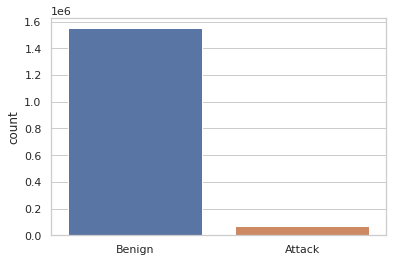

In [ ]:
# If even we merge all the attacks as one the the data distribution will look like
customLabels = []
attacks = list(df['Attack'].values)
for attack in attacks:
  if attack == "Benign":customLabels.append("Benign")
  else:customLabels.append("Attack")
sns.countplot(x=customLabels)


In [ ]:
df['customLabels'] = customLabels
df['customLabels'].value_counts()

Benign    1550712
Attack      72406
Name: customLabels, dtype: int64

## Data Distribution

In [ ]:
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      print("Invalid IP :",addr)
      return "-1"

df = pd.read_csv('NF-UNSW-NB15.csv')
train_columns =['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
print(df.shape)
df = df[df['IPV4_DST_ADDR']!="-1"]
print(df.shape)

X = df[train_columns]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)


(1623118, 14)
(1623118, 14)


## Data Distribution (under-over)

In [ ]:
df = pd.read_csv('NF-UNSW-NB15.csv')


In [ ]:
df['Attack'].value_counts()

Benign            1550712
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: Attack, dtype: int64

In [ ]:
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      print("Invalid IP :",addr)
      return "-1"

df = pd.read_csv('NF-UNSW-NB15.csv')
train_columns =['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
majority = ["Benign","Exploits"]
df_filter = df[df['Attack'].isin(majority)]
# df_filter['Attack'].value_counts()
train_columns = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
X = df_filter[train_columns]
y = df_filter['Attack']
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_res['Attack'] = y_res
df_under = df[~df['Attack'].isin(majority)]
frames = [df_under,X_res]
result = pd.concat(frames)

X = result[train_columns]
# y = df['Label']
y = result['Attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [ ]:
result['Attack'].value_counts()

Benign            24736
Exploits          24736
Fuzzers           19463
Reconnaissance    12291
Generic            5570
DoS                5051
Analysis           1995
Backdoor           1782
Shellcode          1365
Worms               153
Name: Attack, dtype: int64

#Oversampling

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
X_train_ros['Label'] = list(y_train_ros)
X_train_ros.to_csv('unsw_ros_train.csv')
X_test['Label'] = list(y_test)
# X_test.to_csv('unsw_test.csv')

## ROS (multi)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
X_train_ros['Attack'] = list(y_train_ros)
X_train_ros.to_csv('multi_unsw_ros_train.csv')
X_test['Attack'] = list(y_test)
X_test.to_csv('multi_unsw_test.csv')

## SMOTE

In [ ]:
# Either drop or figure out a way to make custom IP address (source and destination)
# X_train = X_train.drop(['IPV4_SRC_ADDR','IPV4_DST_ADDR'], axis=1)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res['Label'] = list(y_res)
X_res.to_csv('unsw_smote_train.csv')

## SMOTE (mutli)

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res['Attack'] = list(y_res)
X_res.to_csv('multi_unsw_smote_train.csv')

In [ ]:
X_res['Attack'].value_counts()

Reconnaissance    19789
Analysis          19789
Exploits          19789
Benign            19789
Fuzzers           19789
DoS               19789
Generic           19789
Shellcode         19789
Worms             19789
Backdoor          19789
Name: Attack, dtype: int64

## Borderline SMOTE

In [ ]:
oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_train_smote['Label'] = list(y_train_smote)
X_train_smote.to_csv('unsw_borderlinesmote_train.csv')

## Borderline SMOTE (multi)

In [ ]:
oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_train_smote['Attack'] = list(y_train_smote)
X_train_smote.to_csv('multi_unsw_borderlinesmote_train.csv')

## SVM SMOTE

In [ ]:
sm = SVMSMOTE(random_state=42)
X_train_svm, y_train_svm = sm.fit_resample(X_train, y_train)
X_train_svm['Label'] = list(y_train_svm)
X_train_svm.to_csv('unsw_svm_train.csv')


## SVM SMOTE (multi)

In [ ]:
sm = SVMSMOTE(random_state=42)
X_train_svm, y_train_svm = sm.fit_resample(X_train, y_train)
X_train_svm['Attack'] = list(y_train_svm)
X_train_svm.to_csv('multi_unsw_svm_train.csv')


# Binary Classification: Baseline

In [ ]:
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]

In [ ]:
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 

In [ ]:
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 

In [ ]:
# drop attack label
df_binary = df.drop(columns=['Attack','customLabels'])

In [ ]:
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

In [ ]:
# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=0)


In [ ]:
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)


In [ ]:
scores

{'fit_time': array([25.53446531, 27.63952374, 26.09769154, 29.21159768, 30.20645905]),
 'score_time': array([4.7603333 , 4.16443634, 3.61050105, 3.27824783, 3.10146332]),
 'test_accuracy': array([0.98569422, 0.98427103, 0.98140618, 0.98658444, 0.99126679]),
 'train_accuracy': array([0.99989141, 0.99987986, 0.99990296, 0.99988448, 0.99984752]),
 'test_roc_auc': array([0.99093151, 0.98660415, 0.98256894, 0.98442033, 0.98389723]),
 'train_roc_auc': array([0.99999981, 0.99999976, 0.99999983, 0.9999998 , 0.99999964]),
 'test_f1': array([0.8483047 , 0.82961826, 0.80466019, 0.851583  , 0.89149156]),
 'train_f1': array([0.99878294, 0.99865348, 0.99891252, 0.99870522, 0.99829089])}

In [ ]:
print('Accuracy: %.3f' % (mean(scores['test_accuracy'])))
print('Area under curve: %.3f ' % (mean(scores['test_roc_auc'])))
print('F1 score: %.3f ' % (mean(scores['test_f1'])))

Accuracy: 0.986
Area under curve: 0.986 
F1 score: 0.845 


#Multi-Label Classification: Baseline

In [ ]:
# drop attack label
df_multi = df.drop(columns=['Label','customLabels'])

In [ ]:
from sklearn.preprocessing import label_binarize
y_col = 'Attack'
y = df_multi[y_col]
X = df_multi[df_multi.columns.drop(y_col)]
#y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=0)


In [ ]:
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X, y, scoring=('accuracy'), cv=cv, n_jobs=-1, error_score='raise')


In [ ]:
print('Accuracy: %.3f' % (mean(scores)))


Accuracy: 0.978


In [ ]:
scores = cross_val_score(clf, X, y, scoring=('f1_macro'), cv=cv, n_jobs=-1, error_score='raise')
print('F1 score: %.3f ' % (mean(scores)))

F1 score: 0.545 


# Binary Classification: ROS

In [ ]:
df_binary = pd.read_csv('unsw_ros_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)


ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
filename = 'unsw_ros.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:

# with open('cse_ros.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('unsw_ros.pkl', 'rb') as f:
#     clf = pickle.load(f)

df_test = pd.read_csv('unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))


Accuracy Score :  0.9893969638720489
Recall:  0.8716939437884124
False Alarm Rate :  0.005107321461390391
Precision:  0.888505666220877
F1 Score :  0.9893486697191495


#Multi-Classification: ROS

In [6]:
from sklearn.metrics import classification_report
df_binary = pd.read_csv('multi_unsw_ros_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_unsw_ros.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_unsw_ros.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
#df_test = df_test[df_test.columns.drop('Label')]
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy Score :  0.5660095733182356
Recall :  0.4462317195443255
False alarm rate :  0.2833281781626972
Precision :  0.4363816358790875
F1 Score :  0.5995104866034784
                precision    recall  f1-score   support

      Analysis       0.12      0.04      0.06       399
      Backdoor       0.11      0.06      0.08       357
        Benign       1.00      0.98      0.99      4947
           DoS       0.19      0.06      0.09      1010
      Exploits       0.97      0.88      0.93      4947
       Fuzzers       0.67      0.12      0.20      3893
       Generic       0.52      0.20      0.29      1114
Reconnaissance       0.32      0.29      0.31      2458
     Shellcode       0.45      0.93      0.61       273
         Worms       0.01      0.90      0.01        31

      accuracy                           0.57     19429
     macro avg       0.44      0.45      0.36     19429
  weighted avg       0.73      0.57      0.60     19429



# Binary Classification: SMOTE



In [ ]:
df_binary = pd.read_csv('unsw_smote_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)
# filename = 'unsw_smote.pkl'
# pickle.dump(clf, open(filename, 'wb'))

ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('cse_ros.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('unsw_smote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

Accuracy Score :  0.9894431711764996
Recall:  0.8716248877839928
False Alarm Rate :  0.005055732355719781
Precision:  0.8894996476391825
F1 Score :  0.9893920723767785


#Multi-Classification: SMOTE

In [8]:
df_binary = pd.read_csv('multi_unsw_smote_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_unsw_ros.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_unsw_ros.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
#df_test = df_test[df_test.columns.drop('Label')]
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred))

Accuracy Score :  0.5540686602501416
Recall :  0.4323361329957004
False alarm rate :  0.28853490050520675
Precision :  0.4048645248378495
F1 Score :  0.582061912725157
                precision    recall  f1-score   support

      Analysis       0.10      0.04      0.06       399
      Backdoor       0.08      0.04      0.06       357
        Benign       1.00      0.98      0.99      4947
           DoS       0.17      0.06      0.08      1010
      Exploits       0.97      0.88      0.92      4947
       Fuzzers       0.60      0.09      0.15      3893
       Generic       0.35      0.13      0.19      1114
Reconnaissance       0.31      0.29      0.30      2458
     Shellcode       0.44      0.92      0.60       273
         Worms       0.00      0.90      0.01        31

      accuracy                           0.55     19429
     macro avg       0.40      0.43      0.34     19429
  weighted avg       0.70      0.55      0.58     19429



#Binary Classification: Borderline SMOTE

In [ ]:
df_binary = pd.read_csv('unsw_borderlinesmote_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('unsw_borderlinesmote.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('unsw_borderlinesmote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

Accuracy Score :  0.9894123663068658
Recall:  0.871279607761895
False Alarm Rate :  0.005071853951241847
Precision:  0.8891472868217054
F1 Score :  0.9893611184006385


#Multi Classification: Borderline Smote

In [9]:
df_binary = pd.read_csv('multi_unsw_borderlinesmote_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_unsw_borderlinesmote_ros.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_unsw_borderlinesmote_ros.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
#df_test = df_test[df_test.columns.drop('Label')]
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred))

Accuracy Score :  0.5527304544752689
Recall :  0.4334966732117116
False alarm rate :  0.2610578410145376
Precision :  0.3856519686917399
F1 Score :  0.5772213308874347
                precision    recall  f1-score   support

      Analysis       0.11      0.04      0.06       399
      Backdoor       0.08      0.04      0.06       357
        Benign       1.00      0.98      0.99      4947
           DoS       0.17      0.06      0.08      1010
      Exploits       0.97      0.88      0.92      4947
       Fuzzers       0.59      0.09      0.15      3893
       Generic       0.40      0.14      0.21      1114
Reconnaissance       0.30      0.28      0.29      2458
     Shellcode       0.24      0.93      0.38       273
         Worms       0.01      0.90      0.01        31

      accuracy                           0.55     19429
     macro avg       0.39      0.43      0.32     19429
  weighted avg       0.70      0.55      0.58     19429



# Binary Classification: SVM SMOTE

In [ ]:
df_binary = pd.read_csv('unsw_svm_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('unsw_svmsmote.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('unsw_svmsmote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

Accuracy Score :  0.9894554931243531
Recall:  0.8707962157309578
False Alarm Rate :  0.0050041432500491706
Precision:  0.8904109589041096
F1 Score :  0.9893994855173429


#Multi-Classification: SVM

In [10]:
df_binary = pd.read_csv('multi_unsw_svm_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_unsw_borderlinesmote_ros.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_unsw_borderlinesmote_ros.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_unsw_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
#df_test = df_test[df_test.columns.drop('Label')]
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

Accuracy Score :  0.5422821555406866
F1 Score :  0.2890669491654041
                precision    recall  f1-score   support

      Analysis       0.03      0.01      0.01       399
      Backdoor       0.08      0.03      0.04       357
        Benign       1.00      0.98      0.99      4947
           DoS       0.19      0.05      0.08      1010
      Exploits       0.97      0.89      0.93      4947
       Fuzzers       0.54      0.07      0.13      3893
       Generic       0.40      0.16      0.23      1114
Reconnaissance       0.24      0.20      0.22      2458
     Shellcode       0.15      0.93      0.25       273
         Worms       0.01      0.94      0.01        31

      accuracy                           0.54     19429
     macro avg       0.36      0.42      0.29     19429
  weighted avg       0.68      0.54      0.56     19429

